# Decision Tree on Individual Household electric power consumption

Data Set Information:

This archive contains 2075259 measurements gathered in a house located in Sceaux (7km of Paris, France) between December 2006 and November 2010 (47 months).

Notes:

1.(global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3) represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3.

2.The dataset contains some missing values in the measurements (nearly 1,25% of the rows). All calendar timestamps are present in the dataset but for some timestamps, the measurement values are missing: a missing value is represented by the absence of value between two consecutive semi-colon attribute separators. For instance, the dataset shows missing values on April 28, 2007.

Attribute Information:

1.date: Date in format dd/mm/yyyy

2.time: time in format hh:mm:ss

3.global_active_power: household global minute-averaged active power (in kilowatt)

4.global_reactive_power: household global minute-averaged reactive power (in kilowatt)

5.voltage: minute-averaged voltage (in volt)

6.global_intensity: household global minute-averaged current intensity (in ampere)

7.sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).

8.sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.

9.sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from six.moves import urllib

warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
# readinag given csv file
# and creating dataframe
df = pd.read_csv("C:\\Users\\sonal\\Downloads\\household_power_consumption\\household_power_consumption.txt")
  
# storing this dataframe in a csv file
df.to_csv('C:\\Users\\sonal\\Downloads\\household_power_consumption\\household_power_consumption.csv', index = None)


In [3]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


# Exploratory Data Analysis

Data Cleaning

In [5]:
df1=df.sample(50000).reset_index().drop('index',axis=1)
df1.drop('Time',axis=1,inplace=True)

Replacing symbols to NAN

In [6]:
df1.replace('?', np.NaN, inplace=True)

In [7]:
df1['Date']=pd.to_datetime(df1['Date'])

In [8]:
col=['Global_active_power','Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2']
df1[col]=df1[col].apply(pd.to_numeric)

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   50000 non-null  datetime64[ns]
 1   Global_active_power    49362 non-null  float64       
 2   Global_reactive_power  49362 non-null  float64       
 3   Voltage                49362 non-null  float64       
 4   Global_intensity       49362 non-null  float64       
 5   Sub_metering_1         49362 non-null  float64       
 6   Sub_metering_2         49362 non-null  float64       
 7   Sub_metering_3         49362 non-null  float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 3.1 MB


In [10]:
#grouping data on the basis of dates
df1 = df1.groupby('Date').sum()
df1.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date,,,,,,,
2006-12-16,33.736,0.524,2367.25,142.8,0.0,28.0,102.0
2006-12-17,84.552,4.924,8926.61,358.0,3.0,25.0,323.0
2006-12-18,51.268,3.940,7955.27,215.6,116.0,33.0,316.0
2006-12-19,22.076,3.004,6049.73,95.2,0.0,69.0,87.0
2006-12-20,51.196,3.690,7992.19,216.2,0.0,82.0,301.0


In [11]:
df1.reset_index(inplace=True)

In [12]:
df1['year']=df1['Date'].dt.year
df1['month']=df1['Date'].dt.month

In [13]:
#We have only 16 values from 2006
df1 = df1[df1['Date']>'2006-12-31']
df1.head()

,Date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,year,month
16,2007-01-01,71.444,3.192,9126.22,295.8,0.0,7.0,137.0,2007,1
17,2007-01-02,48.670,3.498,8871.89,206.8,40.0,7.0,291.0,2007,1
18,2007-01-03,15.086,2.434,8676.96,63.6,0.0,4.0,90.0,2007,1
19,2007-01-04,89.140,5.870,10569.43,375.4,116.0,239.0,613.0,2007,1
20,2007-01-05,54.544,5.020,7230.70,238.0,183.0,50.0,284.0,2007,1


In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1426 entries, 16 to 1441
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   1426 non-null   datetime64[ns]
 1   Global_active_power    1426 non-null   float64       
 2   Global_reactive_power  1426 non-null   float64       
 3   Voltage                1426 non-null   float64       
 4   Global_intensity       1426 non-null   float64       
 5   Sub_metering_1         1426 non-null   float64       
 6   Sub_metering_2         1426 non-null   float64       
 7   Sub_metering_3         1426 non-null   float64       
 8   year                   1426 non-null   int64         
 9   month                  1426 non-null   int64         
dtypes: datetime64[ns](1), float64(7), int64(2)
memory usage: 122.5 KB


In [15]:
#sum() returns the number of missing values in the data set.
df1.isnull().sum()

Date                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
year                     0
month                    0
dtype: int64

In [16]:
# Lets check for duplicates
df1.duplicated().sum()

0

In [17]:
df2=df1.copy()
df2['Total_Sub_metering']=df2['Sub_metering_1']+df2['Sub_metering_2']+df2['Sub_metering_3']
df2 = df2.drop(['Sub_metering_1','Sub_metering_2','Sub_metering_3'],axis=1)

In [18]:
df2['Total_Power_consumption']=(df2['Global_active_power']*1000/60) - df2['Total_Sub_metering']
df2.head()

,Date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,year,month,Total_Sub_metering,Total_Power_consumption
16,2007-01-01,71.444,3.192,9126.22,295.8,2007,1,144.0,1046.733333
17,2007-01-02,48.670,3.498,8871.89,206.8,2007,1,338.0,473.166667
18,2007-01-03,15.086,2.434,8676.96,63.6,2007,1,94.0,157.433333
19,2007-01-04,89.140,5.870,10569.43,375.4,2007,1,968.0,517.666667
20,2007-01-05,54.544,5.020,7230.70,238.0,2007,1,517.0,392.066667


In [19]:
#Lets check the correlation
df2.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,year,month,Total_Sub_metering,Total_Power_consumption
Global_active_power,1.000000,0.292810,0.440908,0.999212,-0.063549,-0.033212,0.880729,0.878287
Global_reactive_power,0.292810,1.000000,0.504916,0.313725,0.090650,0.018256,0.348302,0.165893
Voltage,0.440908,0.504916,1.000000,0.447375,-0.056727,-0.018217,0.378443,0.397214
Global_intensity,0.999212,0.313725,0.447375,1.000000,-0.073573,-0.034358,0.881770,0.875844
year,-0.063549,0.090650,-0.056727,-0.073573,1.000000,-0.034370,0.038825,-0.151511
month,-0.033212,0.018256,-0.018217,-0.034358,-0.034370,1.000000,-0.035754,-0.022605
Total_Sub_metering,0.880729,0.348302,0.378443,0.881770,0.038825,-0.035754,1.000000,0.547079
Total_Power_consumption,0.878287,0.165893,0.397214,0.875844,-0.151511,-0.022605,0.547079,1.000000


In [20]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Global_active_power,1426.0,37.006445,16.950929,0.0,25.6530,35.528000,46.381000,116.704
Global_reactive_power,1426.0,4.240776,1.558648,0.0,3.1675,4.028000,5.094000,11.592
Voltage,1426.0,8253.753597,1610.484096,0.0,7293.0125,8221.010000,9213.527500,12699.050
Global_intensity,1426.0,156.907854,70.591814,0.0,109.4500,150.200000,195.150000,491.200
year,1426.0,2008.462833,1.106450,2007.0,2007.0000,2008.000000,2009.000000,2010.000
month,1426.0,6.437588,3.410299,1.0,3.0000,6.000000,9.000000,12.000
Total_Sub_metering,1426.0,302.693548,161.370662,0.0,188.0000,286.000000,400.000000,1093.000
Total_Power_consumption,1426.0,314.080528,159.847099,0.0,206.9500,289.966667,393.491667,1204.700


Lets drop Date,year and month column and store in 'data' only for better visualization

In [21]:
data=df2.drop(['Date','year','month'], axis=1)
data.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Total_Sub_metering', 'Total_Power_consumption'],
      dtype='object')

In [22]:
num_col=[fea for fea in data.columns if data[fea].dtype != 'O']  #numarical data

# Univariate Analysis

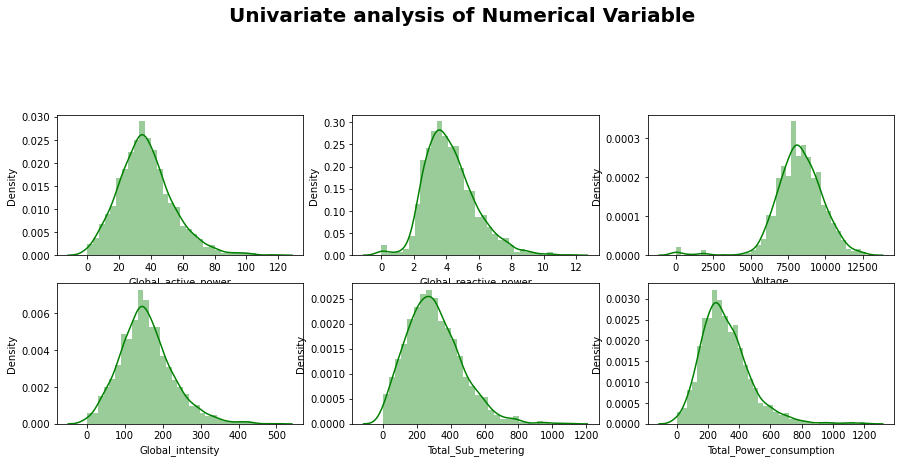

In [23]:
#Univariate Analysis on Numerical feature
plt.figure(figsize=(15,15))
plt.suptitle('Univariate analysis of Numerical Variable', fontsize=20, fontweight='bold')

for i in range (0, len(num_col)):
    plt.subplot(5,3,i+1)
    sns.distplot(data[num_col[i]], color='g')
    plt.xlabel(num_col[i])

# Multivariate analysis

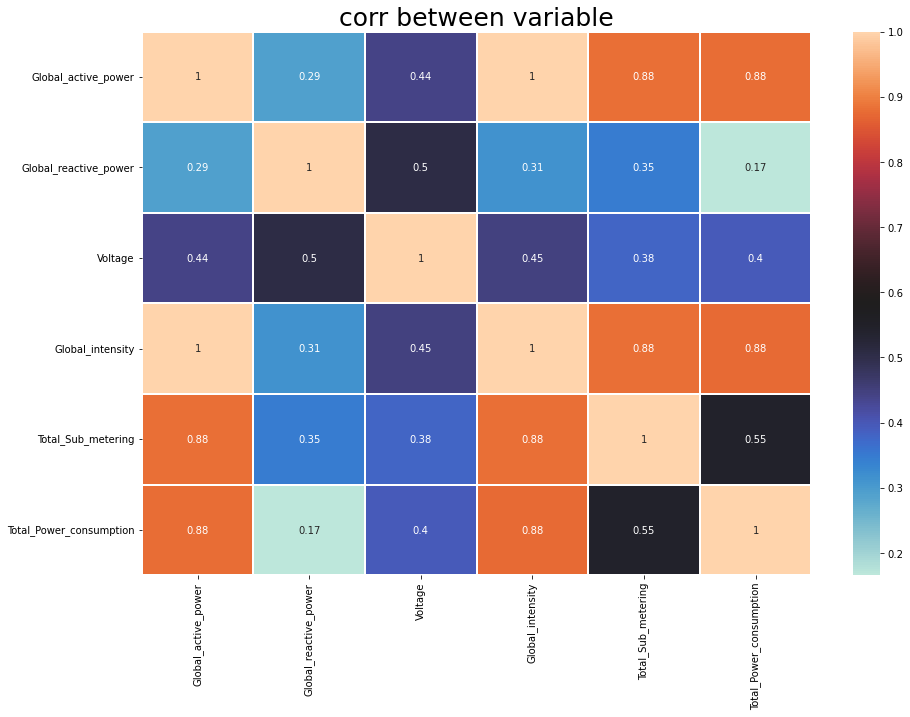

In [24]:
sns.heatmap(data.corr(),annot=True,cmap='icefire',linewidths=0.3)
fig=plt.gcf()
fig.set_size_inches(15,10)
plt.title("corr between variable",color='black',size=25)
plt.show()

Observation:

There is a perfect positive correlation between Global_intensity and Global_active_power

Total_sub_metering and Total_power_consumption are highly correlated to Global_active_power and Global_intensity

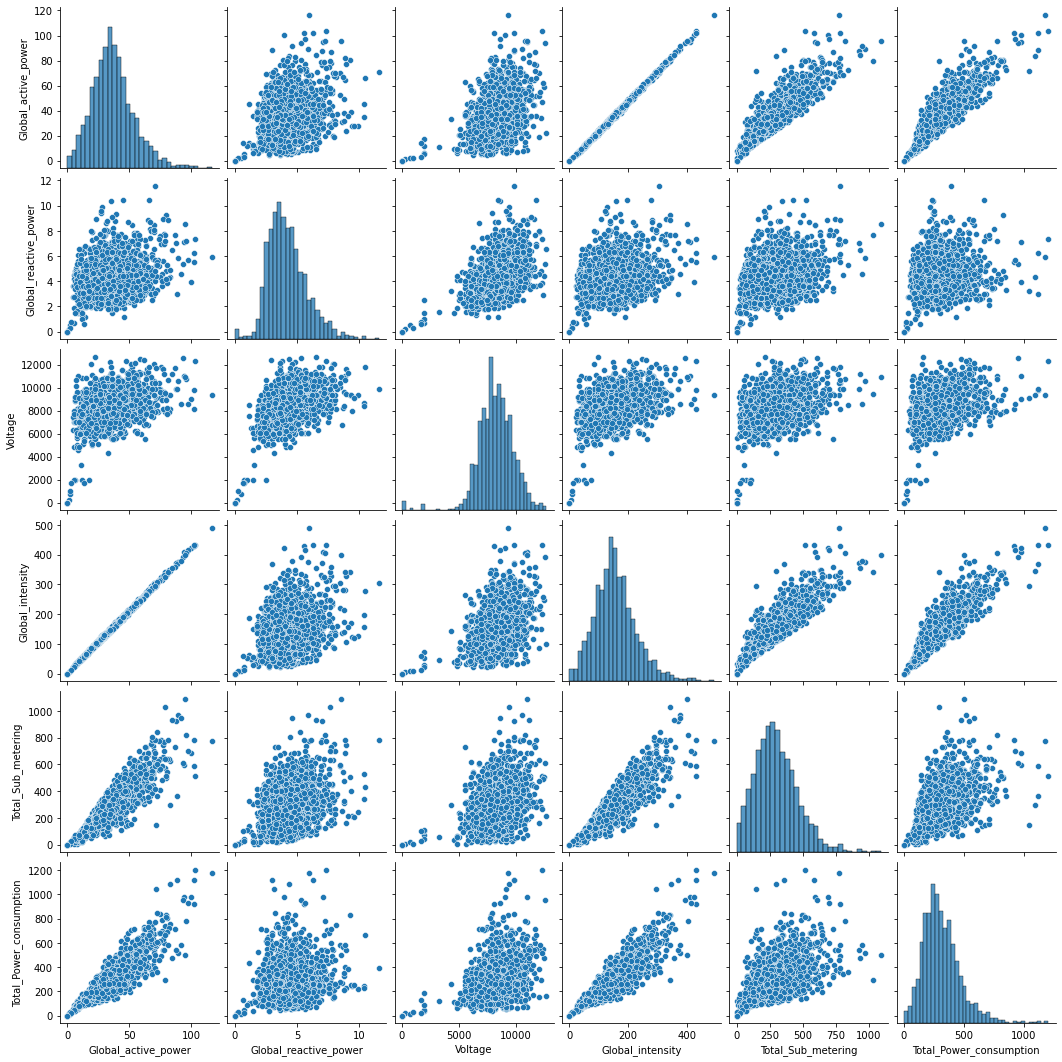

In [25]:
sns.pairplot(data)

<AxesSubplot:>

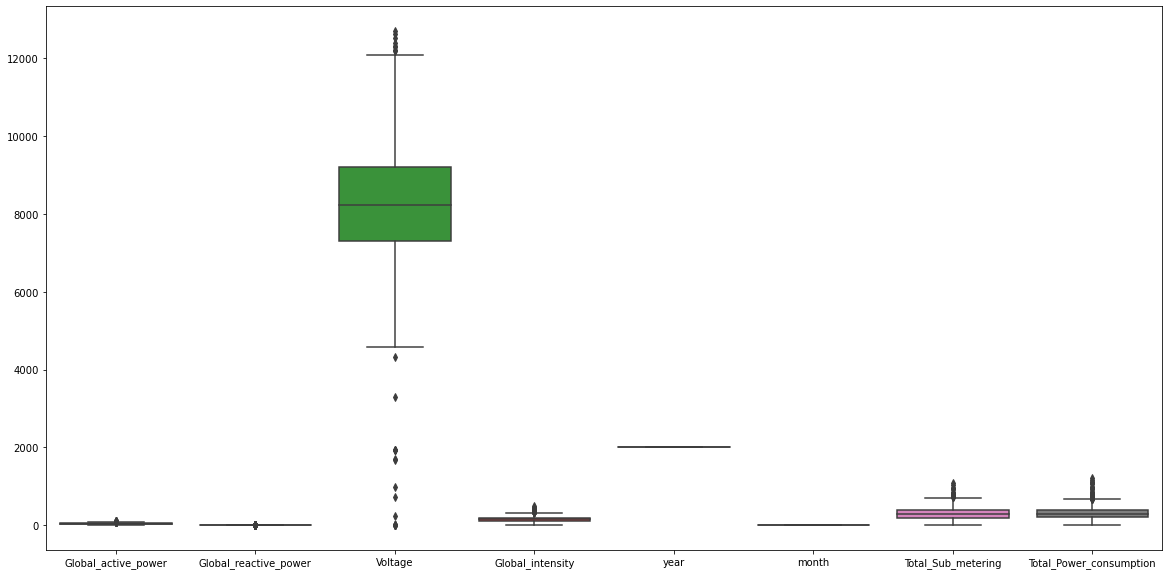

In [26]:
plt.figure(figsize=(20,10))
sns.boxplot(data = df2, orient='v')

In [107]:
#Detecting outliers in dataset
def outlier_thresholds(df2,col_name):
    q1 = df2[col_name].quantile(0.25)
    q3 = df2[col_name].quantile(0.75)
    iqr = q3 - q1
    up_limit = q3 + 1.5 * iqr
    
    low_limit = q1 - 1.5 * iqr
    return low_limit, up_limit

In [108]:
## function to remove outliers
def replace_with_thresholds(df2,columns):
    for col in columns:
        low_limit, up_limit = outlier_thresholds(df2, col)
        data.loc[(df2[col] < low_limit), col] = low_limit
        data.loc[(df2[col] > up_limit), col] = up_limit

In [117]:
data_num=data[num_col]

In [118]:
data_num.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Total_Sub_metering', 'Total_Power_consumption'],
      dtype='object')

In [119]:
replace_with_thresholds(data_num,data_num.columns)

<AxesSubplot:>

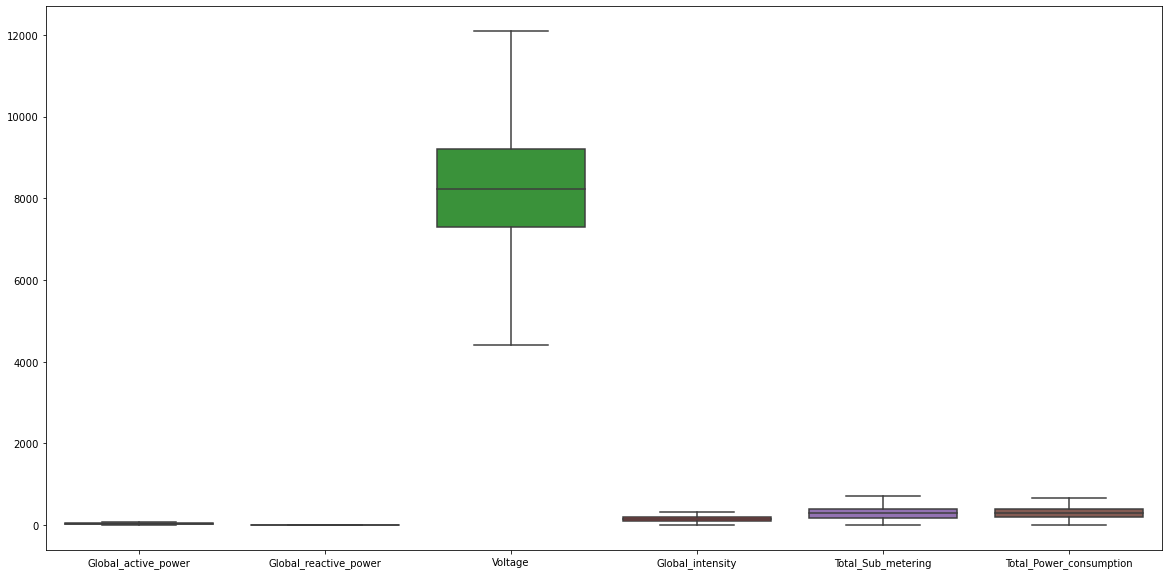

In [120]:
plt.figure(figsize=(20,10))
sns.boxplot(data = data_num, orient='v')

In [121]:
df3=data_num.copy()
df3.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Total_Sub_metering', 'Total_Power_consumption'],
      dtype='object')

In [122]:
df2.columns

Index(['Date', 'Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'year', 'month', 'Total_Sub_metering',
       'Total_Power_consumption'],
      dtype='object')

In [123]:
df3[['year', 'month']] = df2[['year', 'month']].values

In [124]:
df3.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Total_Sub_metering,Total_Power_consumption,year,month
16,71.444,3.192,9126.22,295.8,144.0,673.304167,2007,1
17,48.670,3.498,8871.89,206.8,338.0,473.166667,2007,1
18,15.086,2.434,8676.96,63.6,94.0,157.433333,2007,1
19,77.473,5.870,10569.43,323.7,718.0,517.666667,2007,1
20,54.544,5.020,7230.70,238.0,517.0,392.066667,2007,1


In [125]:
df2=df3.copy()

<AxesSubplot:xlabel='year', ylabel='Total_Power_consumption'>

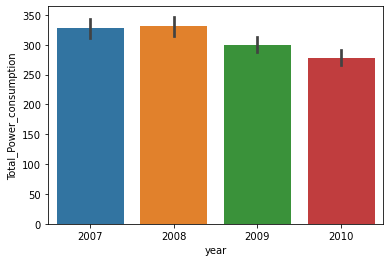

In [126]:
sns.barplot(x='year',y ='Total_Power_consumption',data=df2)

Maximum power consumed is in year 2007

<AxesSubplot:xlabel='month', ylabel='Total_Power_consumption'>

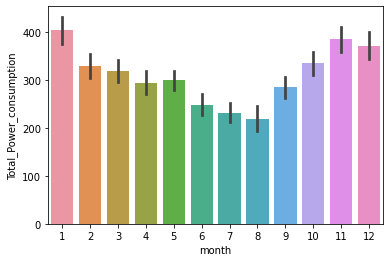

In [127]:
sns.barplot(x='month',y ='Total_Power_consumption',data=df2)

***Maximum power consumption is in January**

<AxesSubplot:xlabel='year'>

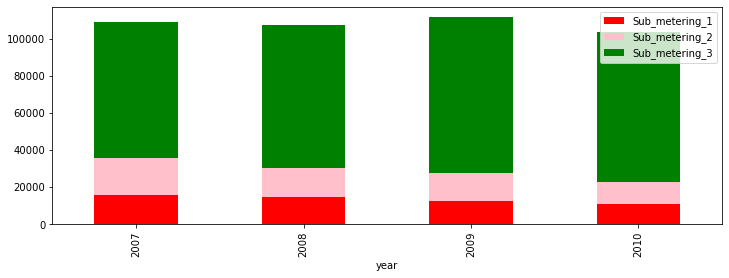

In [128]:
#Yearly sub_meter consumption
df1.groupby('year')['Sub_metering_1','Sub_metering_2','Sub_metering_3'].sum().plot(kind='bar',stacked=True,
                                                                                color=['red', 'pink', 'green'],figsize=(12, 4))

<AxesSubplot:xlabel='month'>

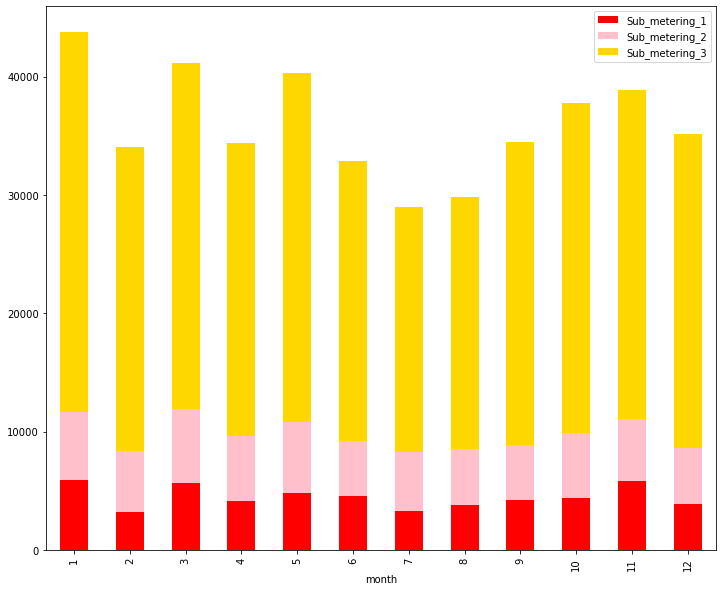

In [129]:
#Monthly sub_meter consumption
df1.groupby('month')['Sub_metering_1','Sub_metering_2','Sub_metering_3'].sum().plot(kind='bar',stacked=True,
                                                                                 color=['red', 'pink', 'gold'],figsize=(12, 10))

In [130]:
#Independent feature: 
x=pd.DataFrame(df2,columns=['Global_active_power', 'Global_reactive_power', 'Voltage','Global_intensity'])

In [131]:
#Dependent variable
y=df2['Total_Sub_metering']

In [132]:
x.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity
16,71.444,3.192,9126.22,295.8
17,48.670,3.498,8871.89,206.8
18,15.086,2.434,8676.96,63.6
19,77.473,5.870,10569.43,323.7
20,54.544,5.020,7230.70,238.0


In [133]:
y.head()

16    144.0
17    338.0
18     94.0
19    718.0
20    517.0
Name: Total_Sub_metering, dtype: float64

In [134]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=30)

In [135]:
x_train.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity
967,14.836,3.502,7001.54,63.4
436,12.408,2.102,9376.53,51.0
1169,57.040,5.244,10004.40,238.0
1174,26.388,2.994,6016.85,113.0
978,10.350,4.662,6032.16,48.6


In [136]:
y_train.head()

967     147.0
436      41.0
1169    494.0
1174    296.0
978      72.0
Name: Total_Sub_metering, dtype: float64

In [137]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [138]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [139]:
model.score(x_train,y_train)

1.0

[Text(0.4732142857142857, 0.9166666666666666, 'X[3] <= 3.2\ngini = 0.997\nsamples = 955\nvalue = [7, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1\n1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2\n1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1\n2, 1, 2, 1, 2, 1, 3, 3, 2, 2, 4, 1, 1, 3\n1, 2, 3, 1, 2, 1, 1, 2, 1, 5, 2, 3, 1, 3\n1, 1, 2, 1, 1, 2, 3, 1, 1, 4, 2, 1, 2, 1\n1, 1, 1, 3, 1, 2, 1, 2, 2, 2, 2, 4, 1, 4\n3, 2, 1, 2, 2, 1, 1, 3, 1, 1, 3, 3, 1, 2\n1, 4, 2, 1, 2, 1, 3, 6, 1, 1, 2, 3, 1, 4\n4, 2, 2, 2, 1, 4, 2, 2, 2, 3, 5, 5, 2, 3\n1, 5, 2, 2, 2, 4, 3, 2, 3, 2, 1, 3, 2, 5\n2, 6, 5, 2, 1, 2, 1, 1, 2, 5, 2, 1, 2, 1\n2, 2, 3, 5, 1, 4, 1, 3, 3, 1, 2, 4, 2, 1\n4, 3, 1, 2, 6, 2, 1, 1, 2, 3, 3, 2, 5, 1\n1, 2, 5, 1, 3, 2, 1, 2, 3, 4, 4, 3, 6, 3\n2, 6, 1, 4, 2, 1, 4, 2, 3, 1, 1, 2, 5, 1\n2, 2, 3, 3, 3, 2, 2, 3, 3, 3, 3, 2, 2, 3\n4, 3, 1, 2, 5, 3, 2, 1, 2, 1, 2, 3, 3, 3\n3, 6, 4, 3, 4, 2, 2, 3, 2, 3, 1, 2, 4, 1\n1, 2, 1, 3, 4, 3, 4, 2, 3, 4, 3, 1, 3, 2\n2, 1, 2, 5, 1, 2, 1, 2, 2, 1, 1, 5, 5, 2\n2, 1, 3, 1, 1, 3, 1,

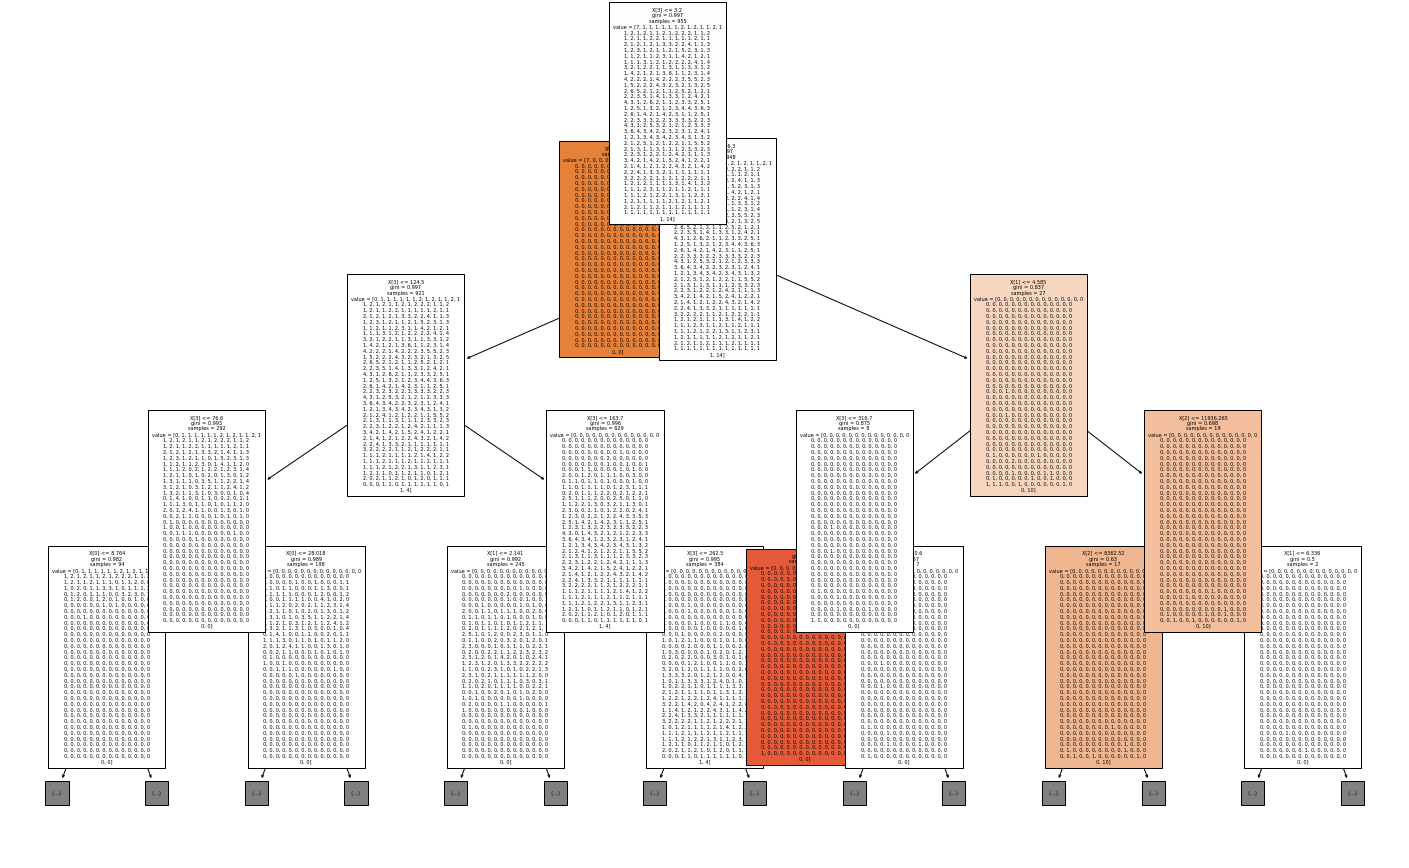

In [140]:
from sklearn import tree
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(25,15))
tree.plot_tree(model, max_depth=4,filled=True,fontsize=5)

In [141]:
y_predict=model.predict(x_test)

In [142]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.01910828025477707

In [143]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,10,1),
    'min_samples_leaf' : range(1,8,1),
    'min_samples_split': range(2,8,1),
    'splitter' : ['best', 'random']
    
}

In [144]:
from sklearn.model_selection import GridSearchCV
grid_searh=GridSearchCV(estimator=model,param_grid=grid_param,cv=3,verbose=1)

In [145]:
grid_searh.fit(x_train,y_train)

Fitting 3 folds for each of 1344 candidates, totalling 4032 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 8),
                         'splitter': ['best', 'random']},
             verbose=1)

In [146]:
grid_searh.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'splitter': 'random'}

In [147]:
model_with_best_params=DecisionTreeClassifier(criterion= 'entropy',max_depth= 3,min_samples_leaf= 2,min_samples_split= 3,
                                              splitter='random')

In [148]:
model_with_best_params.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=2,
                       min_samples_split=3, splitter='random')

[Text(0.5, 0.875, 'X[2] <= 7406.886\nentropy = 8.619\nsamples = 955\nvalue = [7, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1\n1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2\n1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1\n2, 1, 2, 1, 2, 1, 3, 3, 2, 2, 4, 1, 1, 3\n1, 2, 3, 1, 2, 1, 1, 2, 1, 5, 2, 3, 1, 3\n1, 1, 2, 1, 1, 2, 3, 1, 1, 4, 2, 1, 2, 1\n1, 1, 1, 3, 1, 2, 1, 2, 2, 2, 2, 4, 1, 4\n3, 2, 1, 2, 2, 1, 1, 3, 1, 1, 3, 3, 1, 2\n1, 4, 2, 1, 2, 1, 3, 6, 1, 1, 2, 3, 1, 4\n4, 2, 2, 2, 1, 4, 2, 2, 2, 3, 5, 5, 2, 3\n1, 5, 2, 2, 2, 4, 3, 2, 3, 2, 1, 3, 2, 5\n2, 6, 5, 2, 1, 2, 1, 1, 2, 5, 2, 1, 2, 1\n2, 2, 3, 5, 1, 4, 1, 3, 3, 1, 2, 4, 2, 1\n4, 3, 1, 2, 6, 2, 1, 1, 2, 3, 3, 2, 5, 1\n1, 2, 5, 1, 3, 2, 1, 2, 3, 4, 4, 3, 6, 3\n2, 6, 1, 4, 2, 1, 4, 2, 3, 1, 1, 2, 5, 1\n2, 2, 3, 3, 3, 2, 2, 3, 3, 3, 3, 2, 2, 3\n4, 3, 1, 2, 5, 3, 2, 1, 2, 1, 2, 3, 3, 3\n3, 6, 4, 3, 4, 2, 2, 3, 2, 3, 1, 2, 4, 1\n1, 2, 1, 3, 4, 3, 4, 2, 3, 4, 3, 1, 3, 2\n2, 1, 2, 5, 1, 2, 1, 2, 2, 1, 1, 5, 5, 2\n2, 1, 3, 1, 1, 3, 1, 1, 1, 2, 3, 3, 2, 3

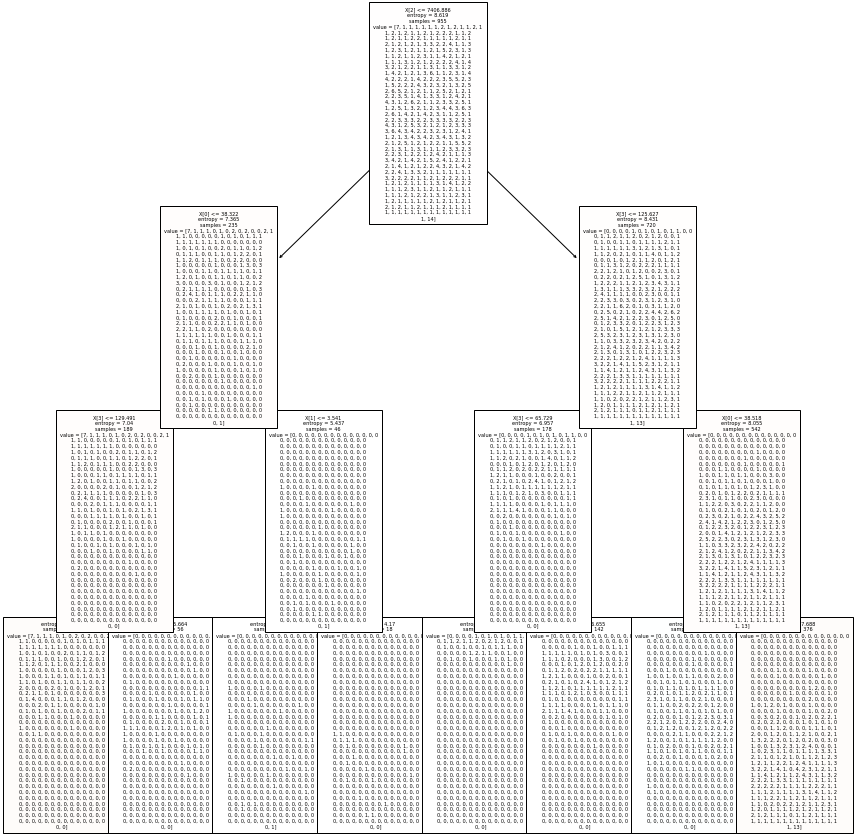

In [149]:
from sklearn import tree
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(15,15))
tree.plot_tree(model_with_best_params,filled=True,fontsize=5)

In [150]:
y_prediction2=model_with_best_params.predict(x_test)

In [151]:
accuracy_score(y_test,y_prediction2)

0.025477707006369428